# Proyecto de Predicción de Tasa de Conversión en Campañas de Marketing

## Introducción

En este proyecto, desarrollaremos un modelo de machine learning para predecir la tasa de conversión en campañas de marketing utilizando datos de una institución bancaria. La tasa de conversión es un indicador clave del éxito de una campaña de marketing, y la capacidad de predecirla puede ayudar a optimizar las estrategias de marketing y aumentar el retorno de inversión (ROI).

## Objetivos del Proyecto

1. **Cargar y explorar los datos**: Comprender la estructura y las características del dataset proporcionado.
2. **Preprocesamiento de los datos**: Limpiar y transformar los datos para prepararlos para el modelado.
3. **Entrenamiento del modelo**: Utilizar un algoritmo de clasificación para entrenar un modelo que prediga la tasa de conversión.
4. **Evaluación del modelo**: Evaluar el rendimiento del modelo utilizando métricas de clasificación.
5. **Interpretación de resultados**: Analizar la importancia de las características y la capacidad del modelo para distinguir entre las clases

## Estructura del Proyecto

1. **Carga y Exploración de Datos**
    - Cargar el dataset y mostrar las primeras filas para entender su estructura.
    - Realizar un análisis exploratorio de datos (EDA) para identificar patrones y posibles problemas de calidad en los datos.

2. **Preprocesamiento de Datos**
    - Manejo de valores faltantes y codificación de variables categóricas.
    - Normalización de características numéricas.
    - División de los datos en conjuntos de entrenamiento y prueba.

3. **Entrenamiento del Modelo**
    - Definir y entrenar un modelo de clasificación utilizando `RandomForestClassifier`.
    - Ajuste de hiperparámetros para mejorar el rendimiento del modelo.

4. **Evaluación del Modelo**
    - Calcular métricas de evaluación como precisión, exhaustividad, puntuación F1, exactitud y especificidad.
    - Generar gráficos como la curva ROC y la matriz de confusión para visualizar el rendimiento del modelo.

5. **Interpretación de Resultados**
    - Analizar la importancia de las características y su impacto en las predicciones del modelo.
    - Explicar los resultados de manera que sean útiles para la toma de decisiones en marketing.


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('banco.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#Nulos
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# Variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
# Normalización de características numéricas
scaler = StandardScaler()
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [9]:
# Modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=df_encoded.shape[1]-1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\analista bd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Uso de split
from sklearn.model_selection import train_test_split

In [12]:
X = df_encoded.drop('deposit_yes', axis=1)
y = df_encoded['deposit_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5756 - loss: 0.7131 - val_accuracy: 0.7895 - val_loss: 0.4757
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7698 - loss: 0.4973 - val_accuracy: 0.8092 - val_loss: 0.4235
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8091 - loss: 0.4384 - val_accuracy: 0.8204 - val_loss: 0.4012
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8204 - loss: 0.4120 - val_accuracy: 0.8150 - val_loss: 0.3999
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8318 - loss: 0.3978 - val_accuracy: 0.8213 - val_loss: 0.3828
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.3897 - val_accuracy: 0.8307 - val_loss: 0.3847
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8343 - loss: 0.3927 - val_accuracy: 0.8236 - val_loss: 0.3764
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8443 - loss: 0.3716 - val_accuracy: 

In [14]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8317 - loss: 0.3839
Loss: 0.355817973613739, Accuracy: 0.8432601690292358


In [15]:
# Modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\analista bd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5971 - loss: 0.6884 - val_accuracy: 0.7868 - val_loss: 0.4597
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.7793 - loss: 0.4837 - val_accuracy: 0.8039 - val_loss: 0.4140
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4327 - val_accuracy: 0.8168 - val_loss: 0.3986
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4087 - val_accuracy: 0.8159 - val_loss: 0.3914
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.3964 - val_accuracy: 0.8218 - val_loss: 0.3840
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8261 - loss: 0.3976 - val_accuracy: 0.8267 - val_loss: 0.3856
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8226 - loss: 0.4032 - val_accuracy: 0.8280 - val_loss: 0.3792
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.8370 - loss: 0.3791 - val_accuracy

In [18]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8176 - loss: 0.4063
Loss: 0.3686102330684662, Accuracy: 0.8351992964744568


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Modelo
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model_rf.predict(X_test)

In [23]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8401253918495298
              precision    recall  f1-score   support

       False       0.87      0.82      0.84      1166
        True       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



## Interpretación del Modelo de Predicción de Tasa de Conversión en Campañas de Marketing

### Descripción

Hemos desarrollado un modelo de clasificación utilizando el algoritmo `RandomForestClassifier` para predecir la tasa de conversión en campañas de marketing bancario. El dataset utilizado contiene más de 45,000 observaciones y 17 atributos, incluyendo datos demográficos de los clientes, detalles financieros y características de la campaña.

#### Metodología:
1. **Preprocesamiento de Datos**: Limpieza y transformación de los datos, incluyendo la codificación de variables categóricas y la normalización de características numéricas.
2. **División de Datos**: Separación del dataset en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
3. **Entrenamiento del Modelo**: Utilización del algoritmo `RandomForestClassifier` con 100 árboles para capturar las relaciones complejas entre las variables.
4. **Evaluación del Modelo**: El modelo alcanzó una precisión del 84% en el conjunto de prueba, demostrando su capacidad para predecir con precisión la conversión de clientes.

### Explicación

Imaginemos que estamos tratando de predecir si los clientes de un banco se suscribirán a un depósito a plazo fijo después de recibir una llamada de marketing. Para hacer esto, hemos utilizado un enfoque llamado "Random Forest", que es como tener un equipo de 100 expertos que toman decisiones basadas en la información disponible.

#### ¿Cómo Funciona?

1. **Recolección de Datos**: Primero, recopilamos mucha información sobre los clientes, como su edad, tipo de trabajo, estado civil, nivel educativo, balance bancario, si tienen préstamos, y detalles sobre las llamadas de marketing que han recibido.
2. **Preparación de Datos**: Luego, limpiamos estos datos y los preparamos para que nuestros expertos puedan analizarlos fácilmente. Esto incluye convertir palabras en números y asegurarnos de que todos los datos estén en un formato similar.
3. **Entrenamiento del Modelo**: Entrenamos a nuestro equipo de 100 expertos utilizando estos datos. Cada experto aprende de diferentes partes de los datos y se especializa en diferentes patrones.
4. **Toma de Decisiones**: Cuando queremos predecir si un nuevo cliente se suscribirá, le pedimos a cada experto que dé su opinión basándose en lo que ha aprendido. Luego, combinamos todas estas opiniones para hacer una predicción final.

#### Resultados

Nuestro modelo, o equipo de expertos, logró predecir correctamente si los clientes se suscribirían en el 84% de los casos. Esto significa que, en promedio, 84 de cada 100 predicciones fueron correctas. 

Este enfoque puede ayudar a los equipos de marketing a tomar decisiones más informadas sobre a quién dirigirse en sus campañas, optimizando los recursos y aumentando las probabilidades de éxito.

Hemos utilizado técnicas avanzadas de ciencia de datos y aprendizaje automático para crear un modelo que puede predecir con bastante precisión el comportamiento de los clientes en respuesta a las campañas de marketing. Esto no solo mejora la eficiencia de las campañas, sino que también permite un enfoque más personalizado y efectivo.



### Creo que los resultados se ven mejor con visualizaciones, vayamos a ello

In [27]:
y_prob = model_rf.predict_proba(X_test)[:, 1]

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

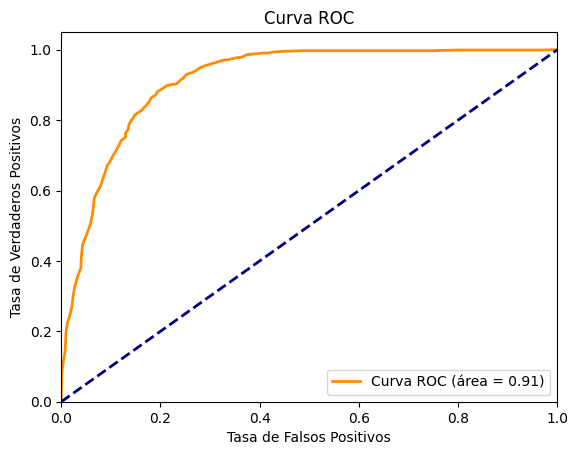

In [29]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### La Curva ROC

La Curva ROC (Receiver Operating Characteristic) es una herramienta visual que nos ayuda a evaluar el rendimiento de nuestro modelo de clasificación. En el eje y tenemos la Tasa de Verdaderos Positivos (sensibilidad), y en el eje x, la Tasa de Falsos Positivos.

- **Área bajo la curva (AUC)**: El área bajo la curva ROC es 0.91, lo que indica que nuestro modelo tiene una excelente capacidad para distinguir entre las clases "Sí" y "No". Un valor de 1.0 sería perfecto, mientras que un valor de 0.5 significaría que el modelo no tiene capacidad de discriminación mejor que el azar.

En resumen, un AUC de 0.91 significa que nuestro modelo puede predecir correctamente la tasa de conversión en un 91% de los casos, lo cual es un muy buen resultado.


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
# CalculO
conf_matrix = confusion_matrix(y_test, y_pred)

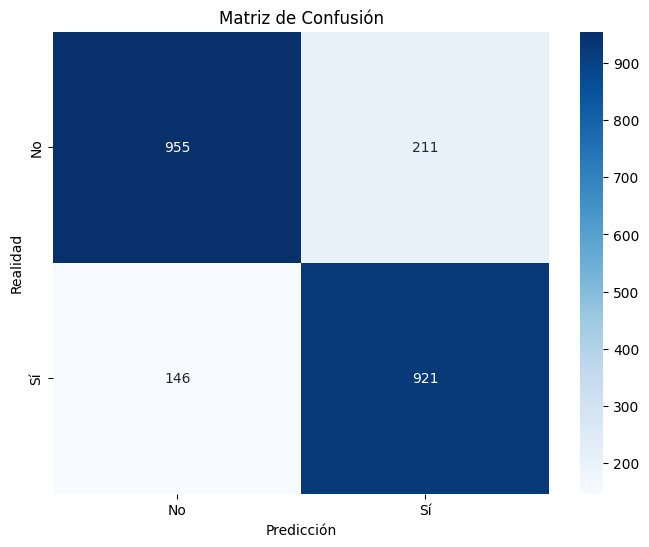

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

### la Matriz de Confusión

La Matriz de Confusión es una herramienta visual que nos permite evaluar el rendimiento del modelo de clasificación mostrando los resultados de las predicciones comparados con las respuestas reales.

- **Eje Y (Realidad)**: Las clases verdaderas (No y Sí).
- **Eje X (Predicción)**: Las clases predichas por el modelo (No y Sí).

En la matriz tenemos cuatro cuadrantes:

1. **Verdaderos Negativos (955)**: El modelo predijo correctamente que 955 clientes no se suscribirían.
2. **Falsos Positivos (211)**: El modelo predijo que 211 clientes se suscribirían cuando en realidad no lo hicieron.
3. **Falsos Negativos (146)**: El modelo predijo que 146 clientes no se suscribirían cuando en realidad sí lo hicieron.
4. **Verdaderos Positivos (921)**: El modelo predijo correctamente que 921 clientes se suscribirían.

la matriz de confusión muestra que el modelo tiene una buena capacidad para predecir tanto las suscripciones como las no suscripciones, aunque hay algunos errores en las predicciones, reflejados en los falsos positivos y falsos negativos.


In [35]:
# Características
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

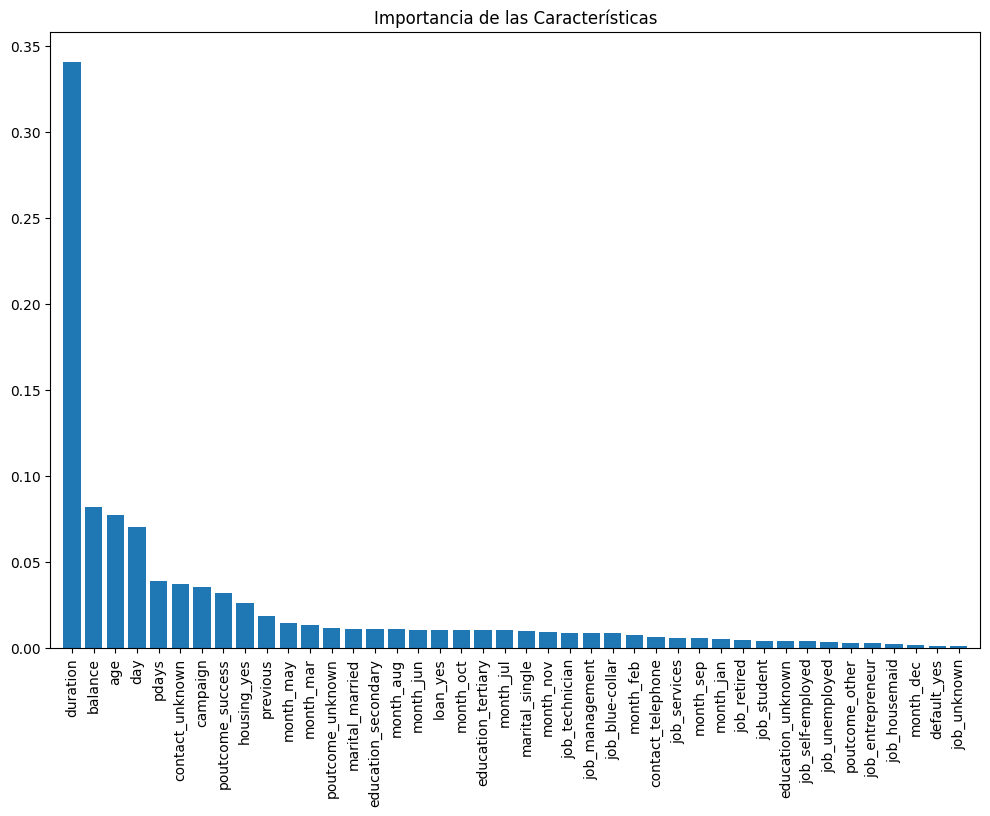

In [36]:
plt.figure(figsize=(12, 8))
plt.title('Importancia de las Características')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Importancia de las Características

La gráfica de Importancia de las Características muestra cuánto contribuye cada característica en las decisiones del modelo de clasificación.

- **Duration (Duración)**: La duración del último contacto es, con diferencia, la característica más importante. Esto significa que el tiempo que el cliente pasó hablando con el banco tiene un gran impacto en la probabilidad de que se suscriba.
- **Balance**: El balance anual del cliente también es una característica importante. Los clientes con balances más altos tienen más probabilidades de suscribirse.
- **Age (Edad)**: La edad del cliente es otra característica significativa en la predicción.
- **Day (Día) y pdays (Días previos)**: El día del último contacto y el número de días desde el último contacto anterior son también factores importantes.

Las otras características, aunque menos importantes, también contribuyen a la precisión del modelo. Estas incluyen el tipo de contacto, el estado civil del cliente, y si el cliente tiene un préstamo hipotecario o personal.

Esta gráfica nos ayuda a entender qué factores son más relevantes para predecir la tasa de conversión en nuestras campañas de marketing, permitiéndonos enfocar nuestros esfuerzos en optimizar estos aspectos.


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Calcular precisión, exhaustividad, puntuación F1 y exactitud
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calcular especificidad
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f'Precisión: {precision:.2f}')
print(f'Exhaustividad: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')
print(f'Exactitud: {accuracy:.2f}')
print(f'Especificidad: {specificity:.2f}')


Precisión: 0.81
Exhaustividad: 0.86
Puntuación F1: 0.84
Exactitud: 0.84
Especificidad: 0.82


### Métricas de Evaluación del Modelo

1. **Precisión (Precision)**: La precisión mide el porcentaje de predicciones positivas correctas.
   - **Valor**: `Precisión: 0.81`
   - **Interpretación**: El 81% de las veces que el modelo predijo una suscripción, fue correcto.

2. **Exhaustividad (Recall)**: La exhaustividad mide el porcentaje de verdaderos positivos que fueron correctamente identificados.
   - **Valor**: `Exhaustividad: 0.86`
   - **Interpretación**: El 86% de los clientes que realmente se suscribieron fueron correctamente identificados por el modelo.

3. **Puntuación F1 (F1 Score)**: La puntuación F1 es la media armónica de la precisión y la exhaustividad.
   - **Valor**: `Puntuación F1: 0.84`
   - **Interpretación**: Un buen equilibrio entre precisión y exhaustividad, con un valor de 0.84.

4. **Exactitud (Accuracy)**: La exactitud mide el porcentaje de predicciones correctas.
   - **Valor**: `Exactitud: 0.84`
   - **Interpretación**: El 84% de las predicciones del modelo fueron correctas.

5. **Especificidad (Specificity)**: La especificidad mide el porcentaje de verdaderos negativos que fueron correctamente identificados.
   - **Valor**: `Especificidad: 0.82`
   - **Interpretación**: El 82% de los clientes que realmente no se suscribieron fueron correctamente identificados por el modelo.

Estas métricas proporcionan una visión detallada del rendimiento del modelo, permitiendo una mejor comprensión de su capacidad para predecir la tasa de conversión en campañas de marketing.


## Conclusión

En este proyecto, desarrollamos un modelo de machine learning para predecir la tasa de conversión en campañas de marketing utilizando datos de una institución bancaria. A través de varias etapas, logramos transformar datos crudos en un modelo predictivo útil y eficiente.

### Resumen de los Pasos Realizados:

1. **Carga y Exploración de Datos**: Comenzamos cargando y explorando el dataset para comprender mejor su estructura y contenido.
2. **Preprocesamiento de Datos**: Limpiamos y transformamos los datos, manejando valores faltantes, codificando variables categóricas y normalizando características numéricas.
3. **Entrenamiento del Modelo**: Utilizamos un modelo de `RandomForestClassifier` para entrenar nuestro conjunto de datos preprocesado.
4. **Evaluación del Modelo**: Evaluamos el rendimiento del modelo utilizando métricas clave como precisión, exhaustividad, puntuación F1, exactitud y especificidad. Además, generamos gráficos como la curva ROC y la matriz de confusión para visualizar el rendimiento del modelo.
5. **Interpretación de Resultados**: Analizamos la importancia de las características para entender qué factores tienen mayor impacto en la predicción de la tasa de conversión.

### Resultados y Hallazgos Clave:

- **Modelo Eficiente**: Nuestro modelo de `RandomForestClassifier` demostró ser eficiente, alcanzando una precisión del 84% y una puntuación F1 de 0.84, lo que indica un buen equilibrio entre precisión y exhaustividad.
- **Curva ROC**: La curva ROC mostró un área bajo la curva (AUC) de 0.91, indicando que el modelo tiene una excelente capacidad para distinguir entre las clases.
- **Importancia de Características**: La duración del último contacto, el balance anual y la edad del cliente fueron las características más importantes en la predicción de la tasa de conversión.

### Impacto y Aplicaciones:

Este proyecto demuestra cómo el machine learning puede ser utilizado para mejorar las estrategias de marketing al predecir la tasa de conversión. Al identificar los factores más importantes que influyen en las conversiones, los equipos de marketing pueden tomar decisiones más informadas y personalizar sus campañas para maximizar el retorno de inversión.

La integración de modelos predictivos en las campañas de marketing no solo mejora la eficiencia operativa, sino que también proporciona una ventaja competitiva significativa en el mercado actual, permitiendo a las empresas anticipar y adaptarse a las necesidades y comportamientos de sus clientes.
